<a href="https://colab.research.google.com/github/mayowaoyaleke/Short_Answer_Grading_System/blob/main/AGS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow_hub as hub
import numpy as np

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
import random
import copy
import time
import pandas as pd
import numpy as np
import gc
import re
import torch

#import spacy
from tqdm import tqdm_notebook, tnrange
from tqdm.auto import tqdm

tqdm.pandas(desc='Progress')
from collections import Counter

from nltk import word_tokenize

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.autograd import Variable
from sklearn.metrics import f1_score
import os 

from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# cross validation and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from torch.optim.optimizer import Optimizer

from sklearn.preprocessing import StandardScaler
from multiprocessing import  Pool
from functools import partial
import numpy as np
from sklearn.decomposition import PCA
import torch as t
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.9 MB/s eta 0:00:00


In [4]:
import torch
import torch.nn as nn
import shutil
import sys

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Automatic Grading System (NLP)/NLP Kaggle DB/Kaggle DB/train.tsv/train.tsv', sep="\t", encoding="ISO-8859-1")
df2 = pd.read_csv('/content/drive/MyDrive/Automatic Grading System (NLP)/NLP Kaggle DB/Kaggle DB/train_rel_2.tsv/train_rel_2.tsv', sep="\t", encoding="ISO-8859-1")


In [6]:
df

,Id,EssaySet,Score1,Score2,EssayText
0,1,1,1,1,Some additional information that we would need...
1,2,1,1,1,"After reading the expirement, I realized that ..."
2,3,1,1,1,"What you need is more trials, a control set up..."
3,4,1,0,0,The student should list what rock is better an...
4,5,1,2,2,For the students to be able to make a replicat...
...,...,...,...,...,...
17202,27584,10,1,1,white :: white becuase if you live in a hot pl...
17203,27585,10,1,1,light gray :: This color will affect the dogho...
17204,27586,10,1,1,light gray :: i think light gray would work th...
17205,27587,10,1,0,dark gray :: if they painted the doghouse dar...


In [7]:
df.drop(['Id','Score2','EssaySet'], axis = 1, inplace = True)

In [8]:
# df = df[df['EssaySet'] == 1]

In [9]:
df2.drop(['Id','Score2','EssaySet'], axis = 1, inplace = True)

In [10]:
#df2 = df2[df2['EssaySet'] == 1]

In [11]:
df

,Score1,EssayText
0,1,Some additional information that we would need...
1,1,"After reading the expirement, I realized that ..."
2,1,"What you need is more trials, a control set up..."
3,0,The student should list what rock is better an...
4,2,For the students to be able to make a replicat...
...,...,...
17202,1,white :: white becuase if you live in a hot pl...
17203,1,light gray :: This color will affect the dogho...
17204,1,light gray :: i think light gray would work th...
17205,1,dark gray :: if they painted the doghouse dar...


In [12]:
#1. Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess1(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess1(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [13]:
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

message cleaned may involve things like adjacent spaces tabs


In [14]:
#2. STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

messag clean may involv thing like adjac space tab


In [15]:
#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [16]:
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

messag clean may involv thing like adjac space tab


In [17]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess1(string)))

df['clean_text'] = df['EssayText'].apply(lambda x: finalpreprocess(x))

df.head()

,Score1,EssayText,clean_text
0,1,Some additional information that we would need...,additional information would need replicate ex...
1,1,"After reading the expirement, I realized that ...",read expirement realize additional information...
2,1,"What you need is more trials, a control set up...",need trial control set exact amount vinegar po...
3,0,The student should list what rock is better an...,student list rock well rock bad procedure
4,2,For the students to be able to make a replicat...,student able make replicate would need tell us...


In [18]:
df.drop('EssayText', axis = 1, inplace = True)

In [19]:
df

,Score1,clean_text
0,1,additional information would need replicate ex...
1,1,read expirement realize additional information...
2,1,need trial control set exact amount vinegar po...
3,0,student list rock well rock bad procedure
4,2,student able make replicate would need tell us...
...,...,...
17202,1,white white becuase live hot place dog house l...
17203,1,light gray color affect doghouse b est darker ...
17204,1,light gray think light gray would work best be...
17205,1,dark gray paint doghouse dark gray doghouse wo...


In [20]:
# df.drop('EssaySet', axis = 1, inplace = True)

In [21]:
from transformers import BertTokenizer, BertModel

In [46]:
embed_size = 300 # how big is each word vector
max_features = 120000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 300 # max number of words in a question to use
batch_size = 512 # how many samples to process at once
n_epochs = 5 # how many times to iterate over all samples
n_splits = 5 # Number of K-fold Splits
SEED = 10
debug = 0

In [36]:
# from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df['clean_text'], df['Score1'],
                                                    stratify=df['Score1'], 
                                                    test_size=0.2)

In [37]:
## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts((train_X))
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

## Pad the sentences 
train_X =tf.keras.preprocessing.sequence.pad_sequences(train_X, maxlen=maxlen)
test_X = tf.keras.preprocessing.sequence.pad_sequences(test_X, maxlen=maxlen)

In [38]:
train_X,train_y

(array([[   0,    0,    0, ...,   31,   89,  390],
        [   0,    0,    0, ...,    0,    0, 2960],
        [   0,    0,    0, ...,  145,  129,   13],
        ...,
        [   0,    0,    0, ...,  651,    6,   52],
        [   0,    0,    0, ...,   52,  495,  136],
        [   0,    0,    0, ...,   69,  109,    6]], dtype=int32), 11116    0
 7523     0
 7390     0
 4012     2
 13084    0
         ..
 6014     2
 3290     0
 2040     1
 2737     3
 1806     3
 Name: Score1, Length: 13765, dtype: int64)

In [47]:
def load_glove(word_index):
    EMBEDDING_FILE = '/content/drive/MyDrive/Automatic Grading System (NLP)/glove.840B.300d.txt/glove.840B.300d.txt'
    def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')[:300]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    
    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = -0.005838499,0.48782197
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_index)+1)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
        else:
            embedding_vector = embeddings_index.get(word.capitalize())
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [48]:
# missing entries in the embedding are set using np.random.normal so we have to seed here too

if debug:
    embedding_matrix = np.random.randn(120000,300)
else:
    embedding_matrix = load_glove(tokenizer.word_index)

In [49]:
 np.shape(embedding_matrix)

(11796, 300)

In [29]:
class CNN_Text(nn.Module):
    
    def __init__(self):
        super(CNN_Text, self).__init__()
        filter_sizes = [1,2,3,5]
        num_filters = 36
        n_classes = 4
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.convs1 = nn.ModuleList([nn.Conv2d(1, num_filters, (K, embed_size)) for K in filter_sizes])
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(len(filter_sizes)*num_filters, n_classes)


    def forward(self, x):
        x = self.embedding(x)  
        x = x.unsqueeze(1)  
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1] 
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  
        x = torch.cat(x, 1)
        x = self.dropout(x)  
        logit = self.fc1(x) 
        return logit

In [30]:
n_epochs = 50
model = CNN_Text()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).cuda()
y_train = torch.tensor(train_y.array, dtype=torch.long).cuda()
x_cv = torch.tensor(test_X, dtype=torch.long).cuda()
y_cv = torch.tensor(test_y.array, dtype=torch.long).cuda()

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),4))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

<ipython-input-30-cc4152a990b7>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()


Epoch 1/50 	 loss=549.0686 	 val_loss=475.9546  	 val_acc=0.5819  	 time=9.50s
Epoch 2/50 	 loss=463.1556 	 val_loss=437.7887  	 val_acc=0.6031  	 time=3.23s
Epoch 3/50 	 loss=432.3189 	 val_loss=423.8038  	 val_acc=0.6063  	 time=3.21s
Epoch 4/50 	 loss=414.9107 	 val_loss=413.0710  	 val_acc=0.6203  	 time=3.20s
Epoch 5/50 	 loss=404.4918 	 val_loss=406.0012  	 val_acc=0.6203  	 time=3.21s
Epoch 6/50 	 loss=391.4576 	 val_loss=399.2864  	 val_acc=0.6249  	 time=3.24s
Epoch 7/50 	 loss=381.9430 	 val_loss=397.8760  	 val_acc=0.6357  	 time=3.26s
Epoch 8/50 	 loss=371.6054 	 val_loss=391.5196  	 val_acc=0.6336  	 time=3.24s
Epoch 9/50 	 loss=363.1496 	 val_loss=392.0041  	 val_acc=0.6392  	 time=3.49s
Epoch 10/50 	 loss=355.1516 	 val_loss=385.8341  	 val_acc=0.6415  	 time=3.27s
Epoch 11/50 	 loss=343.7284 	 val_loss=384.2600  	 val_acc=0.6444  	 time=3.33s
Epoch 12/50 	 loss=338.4248 	 val_loss=382.7687  	 val_acc=0.6447  	 time=3.27s
Epoch 13/50 	 loss=330.0592 	 val_loss=381.4000  

In [31]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

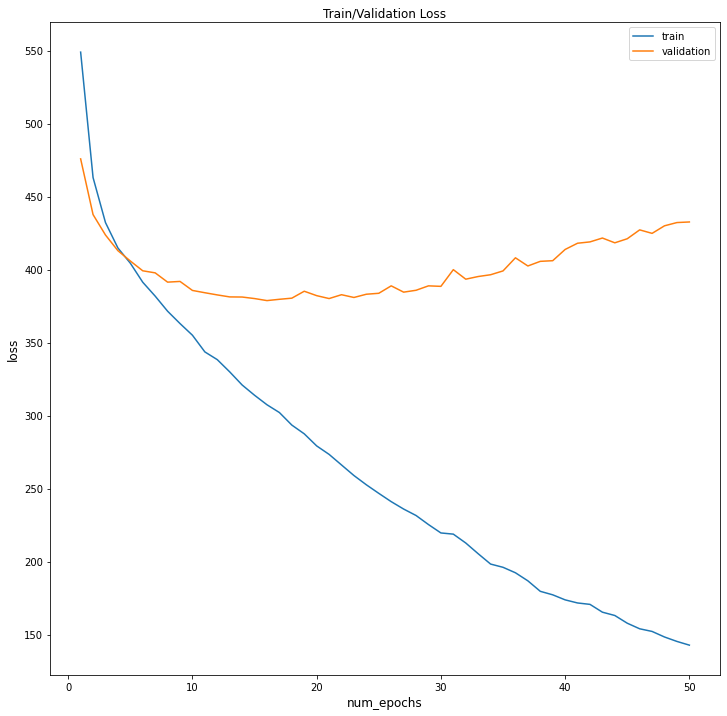

In [32]:
plot_graph(n_epochs)

In [50]:





class BiLSTM(nn.Module):
    
    def __init__(self):
        super(BiLSTM, self).__init__()
        self.hidden_size = 64
        drp = 0.1
        n_classes = 4
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, self.hidden_size, bidirectional=True, batch_first=True, num_layers= 5)
        self.linear = nn.Linear(self.hidden_size*4 , 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(drp)
        self.out = nn.Linear(64, n_classes)


    def forward(self, x):
        #rint(x.size())
        h_embedding = self.embedding(x)
        #_embedding = torch.squeeze(torch.unsqueeze(h_embedding, 0))
        h_lstm, _ = self.lstm(h_embedding)
        avg_pool = torch.mean(h_lstm, 1)
        max_pool, _ = torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.relu(self.linear(conc))
        conc = self.dropout(conc)
        out = self.out(conc)
        return out

In [51]:
n_epochs = 30
model = BiLSTM()
loss_fn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model.cuda()

# Load train and test in CUDA Memory
x_train = torch.tensor(train_X, dtype=torch.long).cuda()
y_train = torch.tensor(train_y.array, dtype=torch.long).cuda()
x_cv = torch.tensor(test_X, dtype=torch.long).cuda()
y_cv = torch.tensor(test_y.array, dtype=torch.long).cuda()

# Create Torch datasets
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

# Create Data Loaders
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

train_loss = []
valid_loss = []

for epoch in range(n_epochs):
    start_time = time.time()
    # Set model to train configuration
    model.train()
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_loader):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss.item() / len(train_loader)
    
    # Set model to validation configuration -Doesn't get trained here
    model.eval()        
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),4))
    
    for i, (x_batch, y_batch) in enumerate(valid_loader):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(valid_loader)
        # keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
    
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==test_y)/len(test_y)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(
                epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))

<ipython-input-51-8b73ba4679a8>:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()


Epoch 1/30 	 loss=627.2915 	 val_loss=552.5420  	 val_acc=0.4593  	 time=7.22s
Epoch 2/30 	 loss=538.7231 	 val_loss=484.3988  	 val_acc=0.5758  	 time=7.20s
Epoch 3/30 	 loss=483.4735 	 val_loss=454.0243  	 val_acc=0.5744  	 time=7.26s
Epoch 4/30 	 loss=451.7125 	 val_loss=426.7255  	 val_acc=0.6058  	 time=7.41s
Epoch 5/30 	 loss=434.3623 	 val_loss=416.0986  	 val_acc=0.6197  	 time=7.51s
Epoch 6/30 	 loss=416.1376 	 val_loss=402.8793  	 val_acc=0.6386  	 time=7.67s
Epoch 7/30 	 loss=399.3269 	 val_loss=396.7651  	 val_acc=0.6383  	 time=7.69s
Epoch 8/30 	 loss=387.9653 	 val_loss=384.8097  	 val_acc=0.6569  	 time=7.68s
Epoch 9/30 	 loss=371.0208 	 val_loss=377.2250  	 val_acc=0.6580  	 time=7.61s
Epoch 10/30 	 loss=359.5612 	 val_loss=370.0604  	 val_acc=0.6732  	 time=7.54s
Epoch 11/30 	 loss=343.0715 	 val_loss=379.1718  	 val_acc=0.6717  	 time=7.48s
Epoch 12/30 	 loss=334.9130 	 val_loss=365.6118  	 val_acc=0.6816  	 time=7.40s
Epoch 13/30 	 loss=321.3857 	 val_loss=373.3657  

In [52]:
def plot_graph(epochs):
    fig = plt.figure(figsize=(12,12))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train')
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation')
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

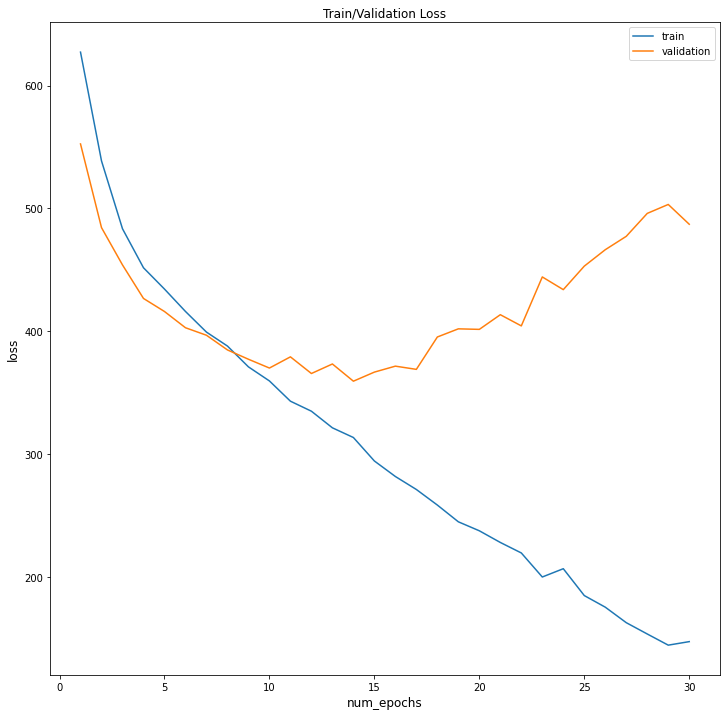

In [53]:
plot_graph(n_epochs)